In [95]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
upload=files.upload()

Saving Housing.csv to Housing.csv


In [96]:
housing_data = pd.read_csv('/content/Housing.csv')

In [97]:
print(housing_data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [98]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [99]:
duplicate_rows = housing_data[housing_data.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


In [100]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


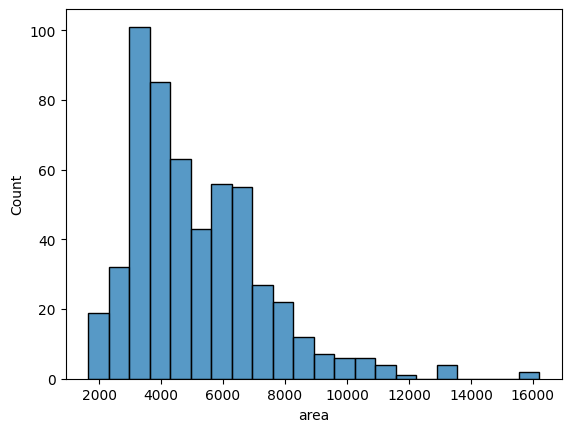

In [101]:
print(housing_data.isnull().sum())
sns.histplot(data=housing_data, x='area')
plt.show()

Text(0.5, 1.0, 'Hot water heating')

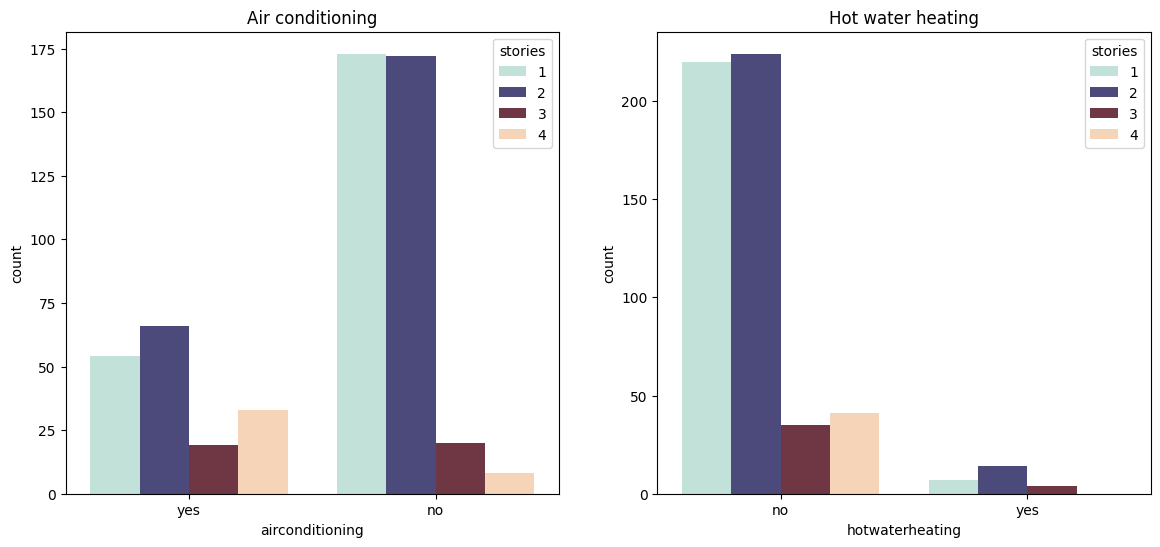

In [102]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Ploting the first countplot on the first subplot (axs[0])
sns.countplot(x=housing_data["airconditioning"], hue=housing_data["stories"], palette="icefire", ax=axs[0])

# Ploting the second countplot on the second subplot (axs[1])
sns.countplot(x=housing_data["hotwaterheating"], hue=housing_data["stories"], palette="icefire", ax=axs[1])

axs[0].set_title("Air conditioning")
axs[1].set_title("Hot water heating")

<ipython-input-103-742f2bb8032b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=housing_data["stories"].index,x=housing_data["basement"],palette="icefire")


<Axes: xlabel='basement', ylabel='None'>

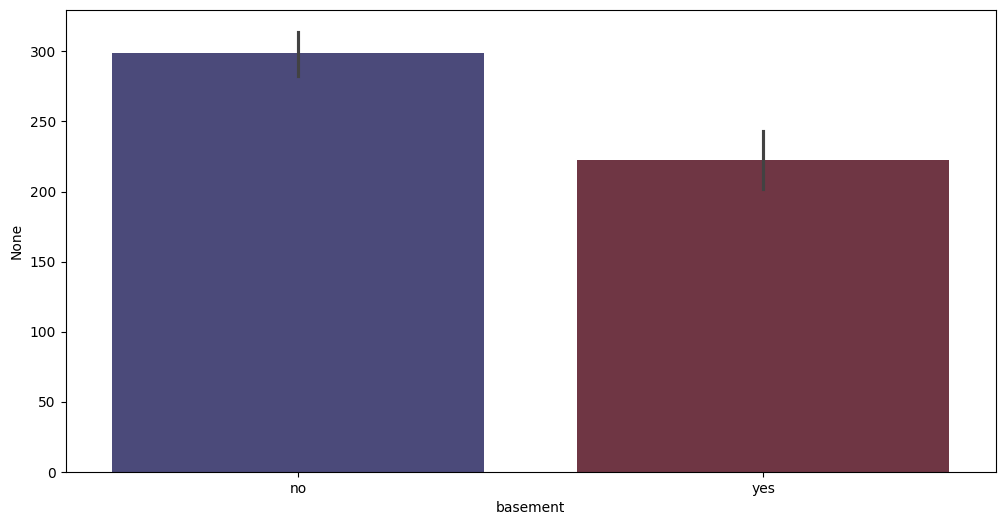

In [103]:
plt.figure(figsize=(12, 6))

sns.barplot(y=housing_data["stories"].index,x=housing_data["basement"],palette="icefire")

In [104]:
housing_data["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [105]:
# Split data into features and target
X = housing_data.drop('price', axis=1)
y = housing_data['price']

In [106]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

In [108]:
# Create a ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Transform the training and testing data
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [109]:
# Feature Selection
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = np.flatnonzero(rfe.support_)
X_train = X_train[:, selected_features]
X_test = X_test[:, selected_features]

In [110]:
# Model Comparison
models = {
    'Linear Regression': LinearRegression(n_jobs=5),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    "SVC":SVC()
}
for model in models.items():
    print(model[0])

Linear Regression
Random Forest
Gradient Boosting
Ridge Regression
SVC


In [111]:
a=1
best_r2=-1
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])


    model=pipe.fit(X_train, y_train)
    y_pre=model.predict(X_test)

    print(f'{a} :- {name} - MSE: {mean_squared_error(y_test, y_pre):.4f}')
    print(f'     {name} - R2: {r2_score(y_test, y_pre):.4f}')
    print(f'     {name} - MAE: {mean_absolute_error(y_test, y_pre):.4f}',"\n")
    a+=1
    r2=r2_score(y_test, y_pre)
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = model

1 :- Linear Regression - MSE: 3485707757497.6230
     Linear Regression - R2: 0.3104
     Linear Regression - MAE: 1376155.2389 

2 :- Random Forest - MSE: 3338143523886.2212
     Random Forest - R2: 0.3396
     Random Forest - MAE: 1335036.6718 

3 :- Gradient Boosting - MSE: 3303764139267.2998
     Gradient Boosting - R2: 0.3464
     Gradient Boosting - MAE: 1328804.5608 

4 :- Ridge Regression - MSE: 3423675545034.6782
     Ridge Regression - R2: 0.3227
     Ridge Regression - MAE: 1364324.4563 

5 :- SVC - MSE: 5063090993119.2656
     SVC - R2: -0.0017
     SVC - MAE: 1623646.7890 



In [112]:
print(f'The best model is: {best_model_name}')
print(f'The best model R2 Score is: {best_r2}')

The best model is: Gradient Boosting
The best model R2 Score is: 0.346380804254002


In [80]:
# Cross-Validation
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [-2.23621892e+12 -2.71164067e+12 -1.27830343e+12 -2.24991038e+12
 -2.37344576e+12]


In [19]:
# Regularization
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [20]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [22]:
# Create the model object
model = RandomForestRegressor()

In [23]:
# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
# Now we can make predictions on the test data!!!
y_pred = model.predict(X_test)
residuals = y_test - y_pred

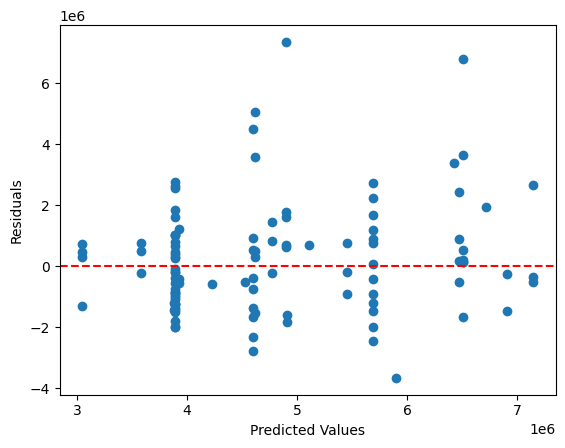

In [25]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [27]:
# Ensemble Methods
bag_model = BaggingRegressor(base_estimator=DecisionTreeRegressor())
bag_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [28]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [51]:
print("Length of transformed_feature_names:", len(transformed_feature_names))
print("Length of importances:", len(importances))


Length of transformed_feature_names: 12
Length of importances: 10


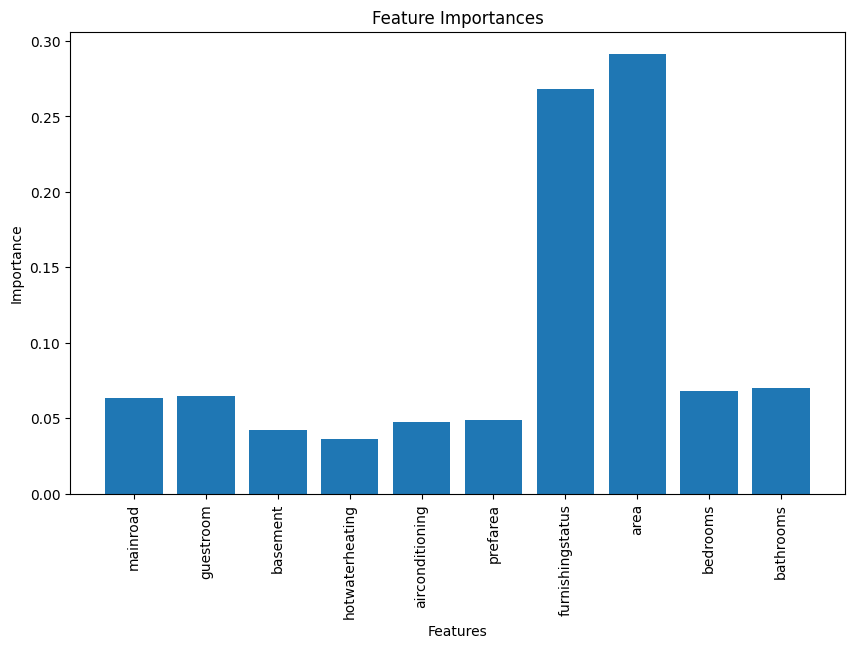

In [52]:
# Filtering out the feature names that don't have corresponding importances
transformed_feature_names = transformed_feature_names[:len(importances)]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(transformed_feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [120]:
# Data to predict on
data_to_predict = [
    [6000, 3, 2, 2, 1, 1, 0, 0, 1, 1],
    [5000, 2, 1, 1, 1, 0, 0, 1, 0, 0],
    [7000, 4, 3, 2, 0, 1, 1, 2, 1, 1],
    [6500, 3, 2, 2, 0, 1, 0, 1, 0, 1]
]


if best_model is not None:
    prediction = best_model.predict(data_to_predict)
    print("Best Model:", best_model_name)
    print("Predicted Price:", prediction)
else:
    print("No best model found. Something went wrong.")

Best Model: Gradient Boosting
Predicted Price: [5539903.96886741 4882351.12996743 4701231.99748452 6065830.98885082]
